In [28]:
import pandas
from sklearn import linear_model
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import pickle

In [10]:
import warnings

warnings.filterwarnings('ignore') # ou warnings.filterwarnings(action='once')

In [11]:
df = pandas.read_csv("data.csv")

In [12]:
df

,weeks,days,time,intensity,change
0,7,5.0,5400,0.71,9.0
1,12,4.0,3600,0.82,16.0
2,12,3.0,3600,0.85,11.0
3,12,4.0,3600,0.75,15.0
4,12,2.5,3600,0.82,15.0
5,14,7.0,3600,0.85,18.0
6,8,3.0,4080,0.60,11.0
7,15,3.0,2400,0.75,19.3
8,8,4.0,2400,0.85,16.0
9,16,2.0,3600,0.82,10.0


In [13]:
X = df[['weeks', 'days', 'time', 'intensity']]
y = df['change']

In [14]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

In [17]:
filename = 'tr_model.sav'
pickle.dump(regr, open(filename, 'wb'))

In [18]:
new_change = regr.predict([[10, 3, 2700, 0.85]])

In [19]:
new_change

array([10.15093362])

### For sjov ..

In [20]:
# Print the Intercept:
print('intercept:', regr.intercept_)

# Print the Slope:
print('slope:', regr.coef_) 

intercept: 3.228361771351169
slope: [ 5.42478733e-01  1.62558611e+00  1.71038331e-04 -4.51856155e+00]


In [21]:
X['intensity'],y

(0     0.71
 1     0.82
 2     0.85
 3     0.75
 4     0.82
 5     0.85
 6     0.60
 7     0.75
 8     0.85
 9     0.82
 10    0.70
 11    0.85
 12    0.75
 13    0.80
 14    0.70
 15    0.80
 16    0.75
 17    0.75
 Name: intensity, dtype: float64,
 0      9.0
 1     16.0
 2     11.0
 3     15.0
 4     15.0
 5     18.0
 6     11.0
 7     19.3
 8     16.0
 9     10.0
 10     1.7
 11     2.0
 12    12.5
 13    17.0
 14    18.5
 15     7.4
 16     8.0
 17    10.0
 Name: change, dtype: float64)

In [22]:
data = {
    'weeks': [12, 12, 12, 12],
    'days': [4, 4, 5, 3],
    'time': [3600, 3600, 5400, 3600],
    'intensity': [0.75, 0.82, 0.71, 0.85],
    'change': [0.15, 0.16, 0.09, 0.11]
}

In [23]:
new_df = pandas.DataFrame(data)

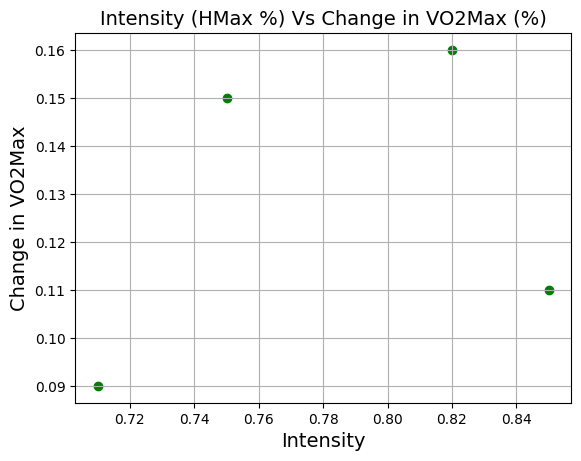

In [24]:
plt.scatter(new_df['intensity'], new_df['change'], color='green')
plt.title('Intensity (HMax %) Vs Change in VO2Max (%)', fontsize=14)
plt.xlabel('Intensity', fontsize=14)
plt.ylabel('Change in VO2Max', fontsize=14)
plt.grid(True)
plt.show()

In [29]:
x = df[['weeks','days', 'time', 'intensity']]
y = df['change']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 3.228361771351169
Coefficients: 
 [ 5.42478733e-01  1.62558611e+00  1.71038331e-04 -4.51856155e+00]
                            OLS Regression Results                            
Dep. Variable:                 change   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     1.323
Date:                Fri, 10 Feb 2023   Prob (F-statistic):              0.313
Time:                        11:16:36   Log-Likelihood:                -51.807
No. Observations:                  18   AIC:                             113.6
Df Residuals:                      13   BIC:                             118.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------

array([[<AxesSubplot: xlabel='weeks', ylabel='weeks'>,
        <AxesSubplot: xlabel='days', ylabel='weeks'>,
        <AxesSubplot: xlabel='time', ylabel='weeks'>,
        <AxesSubplot: xlabel='intensity', ylabel='weeks'>],
       [<AxesSubplot: xlabel='weeks', ylabel='days'>,
        <AxesSubplot: xlabel='days', ylabel='days'>,
        <AxesSubplot: xlabel='time', ylabel='days'>,
        <AxesSubplot: xlabel='intensity', ylabel='days'>],
       [<AxesSubplot: xlabel='weeks', ylabel='time'>,
        <AxesSubplot: xlabel='days', ylabel='time'>,
        <AxesSubplot: xlabel='time', ylabel='time'>,
        <AxesSubplot: xlabel='intensity', ylabel='time'>],
       [<AxesSubplot: xlabel='weeks', ylabel='intensity'>,
        <AxesSubplot: xlabel='days', ylabel='intensity'>,
        <AxesSubplot: xlabel='time', ylabel='intensity'>,
        <AxesSubplot: xlabel='intensity', ylabel='intensity'>]],
      dtype=object)

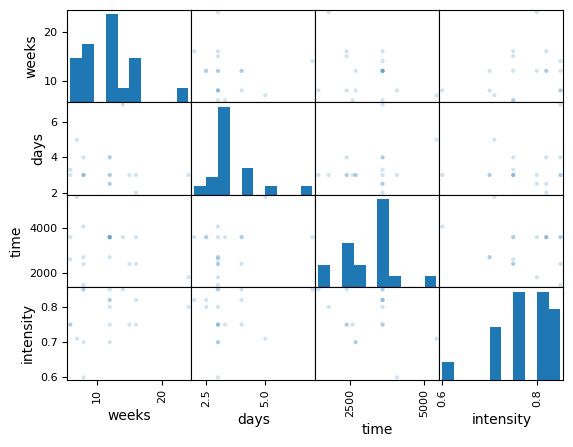

In [31]:
pandas.plotting.scatter_matrix(X, alpha=0.2)

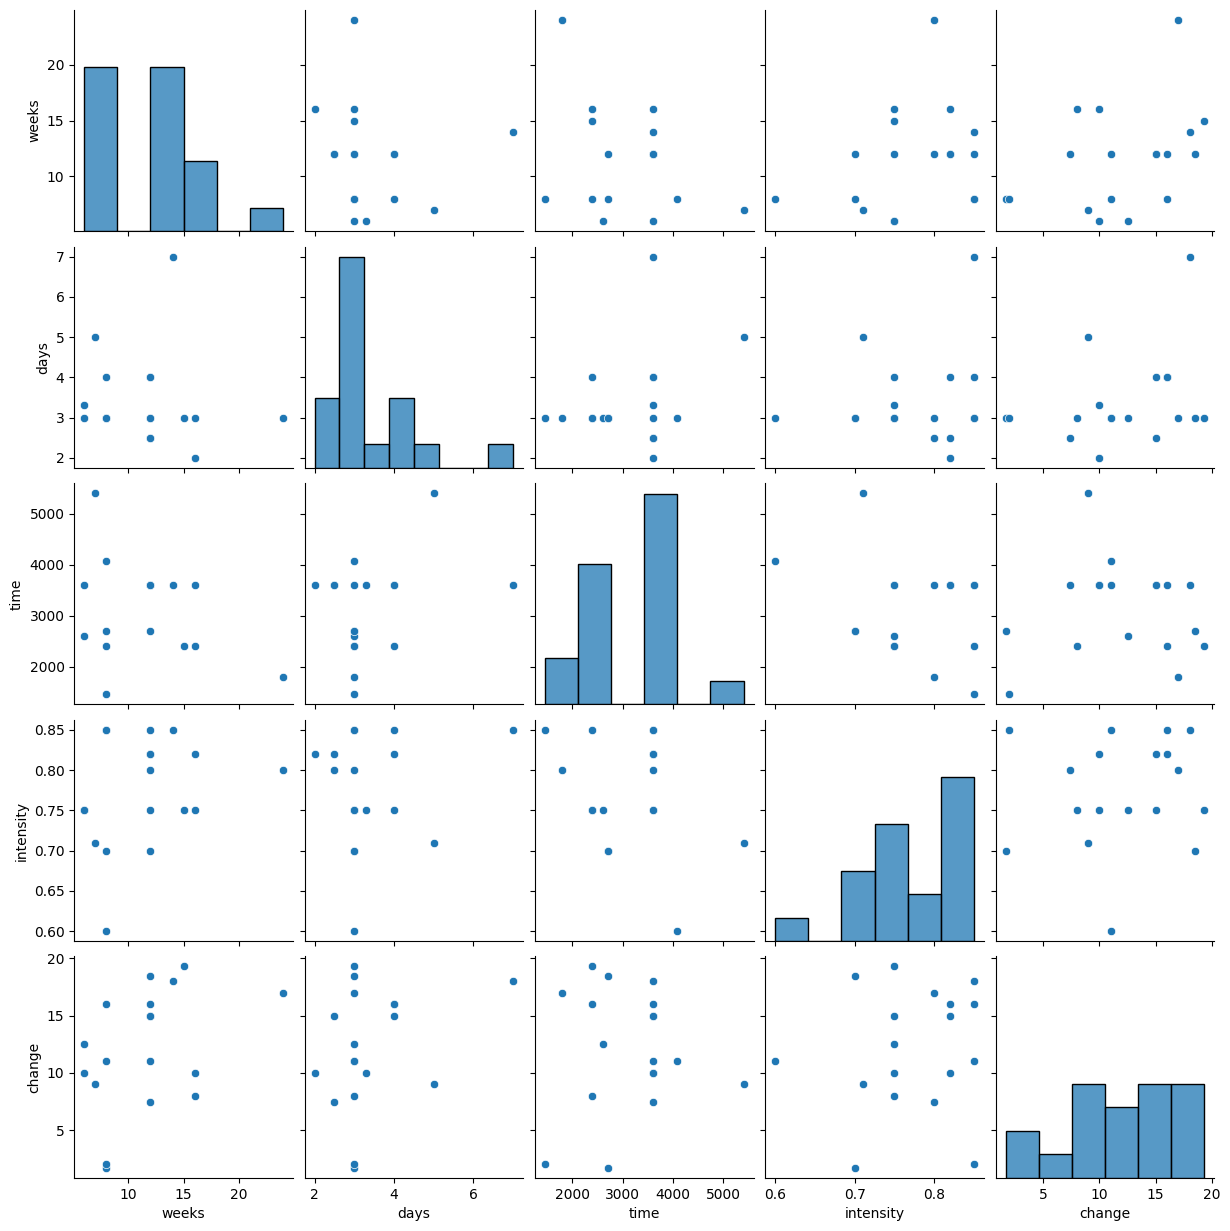

In [32]:
sns.pairplot(df)